# Chapter 1 & 2: Practice Exercises with Solutions
---

In this exercise, you will gain insight into public health by generating simple graphical and numerical summaries of a dataset collected by the U.S. Centers for Disease Control and Prevention (CDC).

The Behavioral Risk Factor Surveillance System (BRFSS) is an annual telephone survey of 350,000 people in the United States. As its name implies, the BRFSS is designed to identify risk factors in the adult population and report emerging health trends. For example, respondents are asked about their diet and weekly physical activity, their HIV/AIDS status, possible tobacco use, and even their level of healthcare coverage.

Data source: https://www.cdc.gov/brfss/

In this exercise, we will focus on a random sample of 20,000 people from the BRFSS survey conducted in 2000. While there are over 200 variables in this data set, we will work with a small subset.

The data set is available as a CSV file named `cdc.csv` (Download from [here](https://raw.githubusercontent.com/imranture/practice_stats/main/datasets/cdc.csv)).

---

**Exercise 1:** Place the CSV file under the same directory where your Jupyter Notebook file is. Import Pandas as "pd" and NumPy as "np". Read the data into a Pandas data frame called `df`.

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('datasets/cdc.csv')  ## Update the directory before running this cell.

---

**Exercise 2:** How many observations are there in this dataset?

**Hint:** Use `shape()`.

In [2]:
df.shape[0]

20000

---

**Exercise 3:** Display the first 10 rows.

In [3]:
df.head(10)

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender
0,good,0,1,0,70,175,175,77,m
1,good,0,1,1,64,125,115,33,f
2,good,1,1,1,60,105,105,49,f
3,good,1,1,0,66,132,124,42,f
4,very good,0,1,0,61,150,130,55,f
5,very good,1,1,0,64,114,114,55,f
6,very good,1,1,0,71,194,185,31,m
7,very good,0,1,0,67,170,160,45,m
8,good,0,1,1,65,150,130,27,f
9,good,1,1,0,70,180,170,44,m


---

**Exercise 4:** How many variables are there in this dataset? For each variable, identify its data type (e.g., categorical, numerical).

**Hint:** Try using Pandas' `dtypes()` method on your data frame. In the output of this method, `object` data type ("dtype") stands for a string type, which usually indicates a categorical variable. However, some numerical variables can actually be categorical in nature (think about `hlthplan`, for instance).

In [4]:
df.shape[1]

9

In [5]:
print(df.dtypes)

print('''
Categorical variables: 
genhlth (ordinal), exerany, hlthplan, smoke100 and gender''')

print('''
Numerical variables: 
height, weight, wtdesire and age''')

genhlth     object
exerany      int64
hlthplan     int64
smoke100     int64
height       int64
weight       int64
wtdesire     int64
age          int64
gender      object
dtype: object

Categorical variables: 
genhlth (ordinal), exerany, hlthplan, smoke100 and gender

Numerical variables: 
height, weight, wtdesire and age


---

**Exercise 5:**  State how many levels each categorical variable has. Print all the levels for each categorical variable.

**Hint:** Use Pandas' `unique()` and `nunique()`.

In [6]:
categorical_variables = ['genhlth', 'exerany', 'hlthplan', 'smoke100', 'gender']

for col in categorical_variables:
    print(f'column: {col}')
    print(f'{df[col].unique()}')
    print(f'There are {df[col].nunique()} levels in {col} categorical variable.\n')

column: genhlth
['good' 'very good' 'excellent' 'fair' 'poor']
There are 5 levels in genhlth categorical variable.

column: exerany
[0 1]
There are 2 levels in exerany categorical variable.

column: hlthplan
[1 0]
There are 2 levels in hlthplan categorical variable.

column: smoke100
[0 1]
There are 2 levels in smoke100 categorical variable.

column: gender
['m' 'f']
There are 2 levels in gender categorical variable.



---

**Exercise 6:** Find the mean, sample standard deviation, and median of `weight`.

In [7]:
print('mean: ', df['weight'].mean().round(2))
print('std: ', df['weight'].std(ddof = 1).round(2))
print('median: ', df['weight'].median())

mean:  169.68
std:  40.08
median:  165.0


---

**Exercise 7:** Find the mean, sample standard deviation, and median of `weight` for respondents who exercised in the past month. Is there any significant difference in the results when compared to the results of Exercise 6?

**Hint:** `exerany` is the variable that is 1 if the respondent exercised in the past month and 0 otherwise.

In [8]:
print('mean: ', df[df['exerany'] == 1]['weight'].mean().round(2))
print('std: ', df[df['exerany'] == 1]['weight'].std(ddof = 1).round(2))
print('median: ', df[df['exerany'] == 1]['weight'].median())

mean:  169.04
std:  38.83
median:  165.0


Compared with the previous results, there seems to be no significant difference.

---

**Exercise 8:** Compute the 5-number summary for `wtdesire`, respondent's desired weight in pound, in ascending order (that is, min, Q1, Q2 (median), Q3, and max). Also compute the interquartile range (IQR) for this variable (which is Q3-Q1). In addition, compute max upper whisker reach and max lower whisker reach. Based on these values, how many outliers are there for `wtdesire`? Finally, using Matplotlib, create a boxplot for this variable.

**Hint:** For quantiles, you can use NumPy' `quantile()`.

In [9]:
min_val = df['wtdesire'].min()
q1_val  = df['wtdesire'].quantile(0.25)
q2_val  = df['wtdesire'].quantile(0.50)  # this is also the median
q3_val  = df['wtdesire'].quantile(0.75)
max_val = df['wtdesire'].max()
iqr     = q3_val - q1_val

print('min:', min_val)
print('q1:', q1_val)
print('q2 (median):', q2_val)
print('q3:', q3_val)
print('max:', max_val)
print('IQR:', iqr)

min: 68
q1: 130.0
q2 (median): 150.0
q3: 175.0
max: 680
IQR: 45.0


In [10]:
max_whisker = q3_val + 1.5*iqr
min_whisker = q1_val - 1.5*iqr
print('max_whisker:', max_whisker)
print('min_whisker:', min_whisker)

max_whisker: 242.5
min_whisker: 62.5


In [11]:
wtdesire_outliers = df[(df['wtdesire'] < min_whisker) | 
                        (df['wtdesire'] > max_whisker)]['wtdesire']

# print the highest 5 wtdesire outlier values
print(wtdesire_outliers.sort_values(ascending = False).head())

print('Number of "wtdesire" outliers:', wtdesire_outliers.shape[0])

16873    680
10033    601
13606    350
1615     325
9110     325
Name: wtdesire, dtype: int64
Number of "wtdesire" outliers: 175


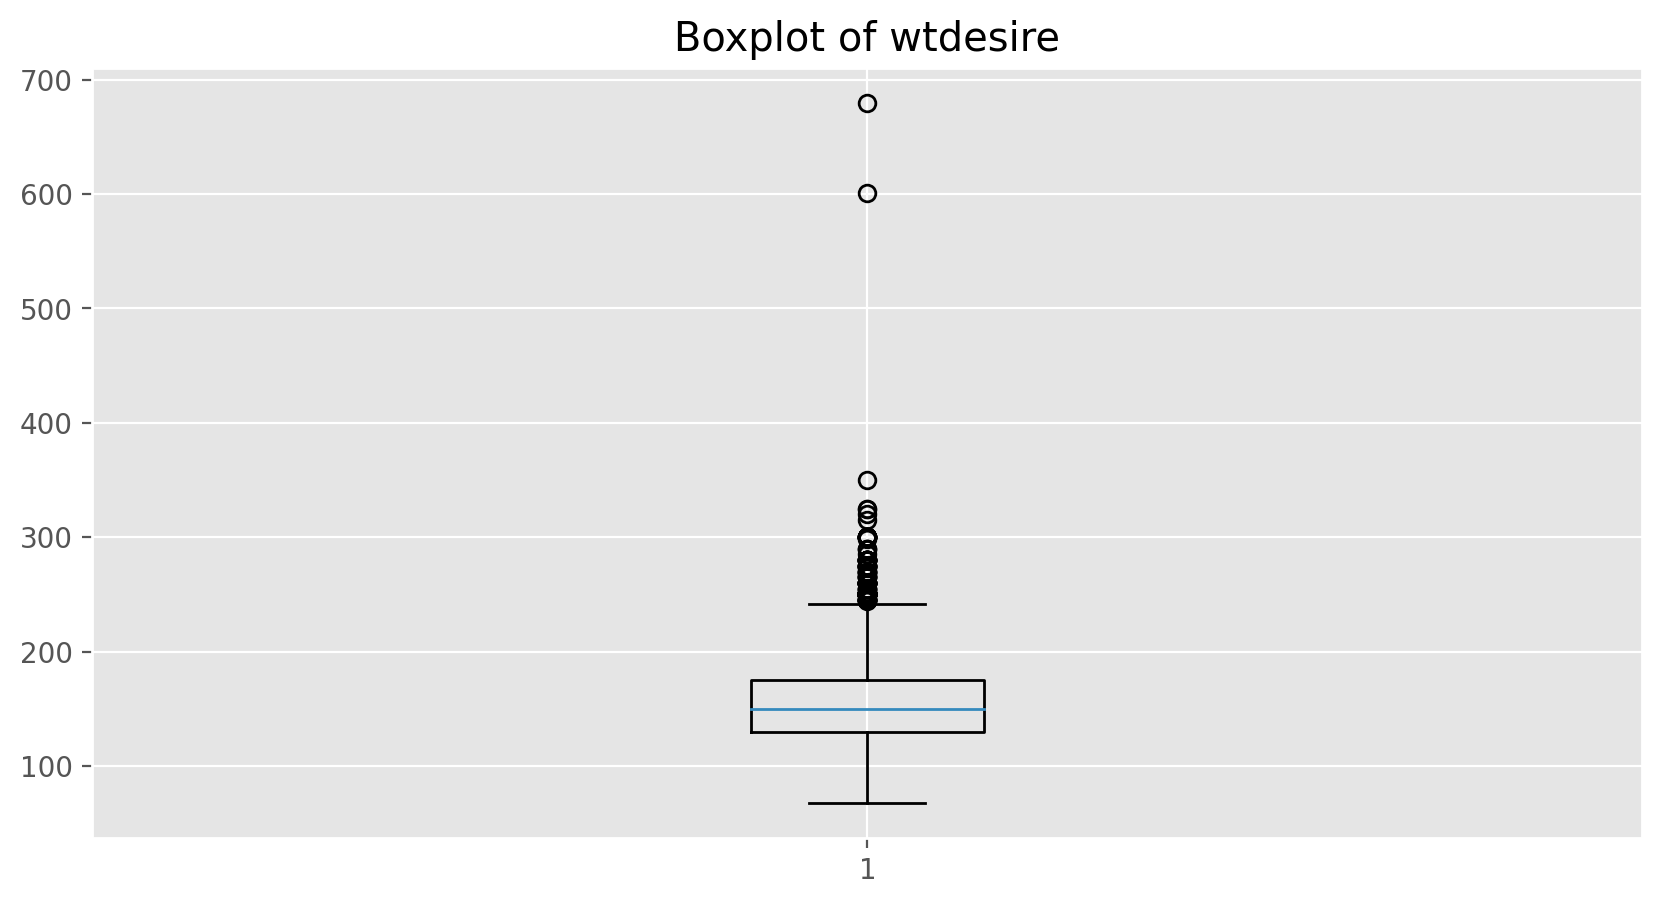

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (10, 5)

plt.boxplot(x = df['wtdesire'])
plt.title("Boxplot of wtdesire")
plt.show();

---

**Exercise 9:** Let's consider a new variable: the difference between desired weight (`wtdesire`) and current weight (`weight`). Create this new variable by subtracting the two columns in the `df` data frame and assigning them to a new variable called `wdiff`. Display the first 5 rows of `df`. How many columns are there?

In [13]:
df['wdiff'] = df['wtdesire'] - df['weight']
df.head()

,genhlth,exerany,hlthplan,smoke100,height,weight,wtdesire,age,gender,wdiff
0,good,0,1,0,70,175,175,77,m,0
1,good,0,1,1,64,125,115,33,f,-10
2,good,1,1,1,60,105,105,49,f,0
3,good,1,1,0,66,132,124,42,f,-8
4,very good,0,1,0,61,150,130,55,f,-20


---

**Exercise 10:** What percent of respondents' `wdiff` is zero? Comment on the result.

In [14]:
wdiff_zero = df['wdiff'][df['wdiff'] == 0].shape[0] / df.shape[0] * 100

print(f'Only {wdiff_zero}% of the respondents are happy with their current weight.')

Only 28.08% of the respondents are happy with their current weight.


---

**Exercise 11:** What percent of respondents think they are overweight, that is, their `wdiff` value is less than 0? What percent of respondents think they are underweight?

In [15]:
underweight = df['wdiff'][df['wdiff'] > 0].shape[0] / df.shape[0] * 100
overweight = df['wdiff'][df['wdiff'] < 0].shape[0] / df.shape[0] * 100

print(f'Only {underweight}% of the respondents think they are underweight.')
print(f'About {overweight}% of the respondents think they are overweight.')

Only 8.1% of the respondents think they are underweight.
About 63.82% of the respondents think they are overweight.


---

**Exercise 12:** Create a side-by-side boxplot to determine if men tend to view their weight differently than women.

**Hint**: For this, you will need to use the *seaborn* module.

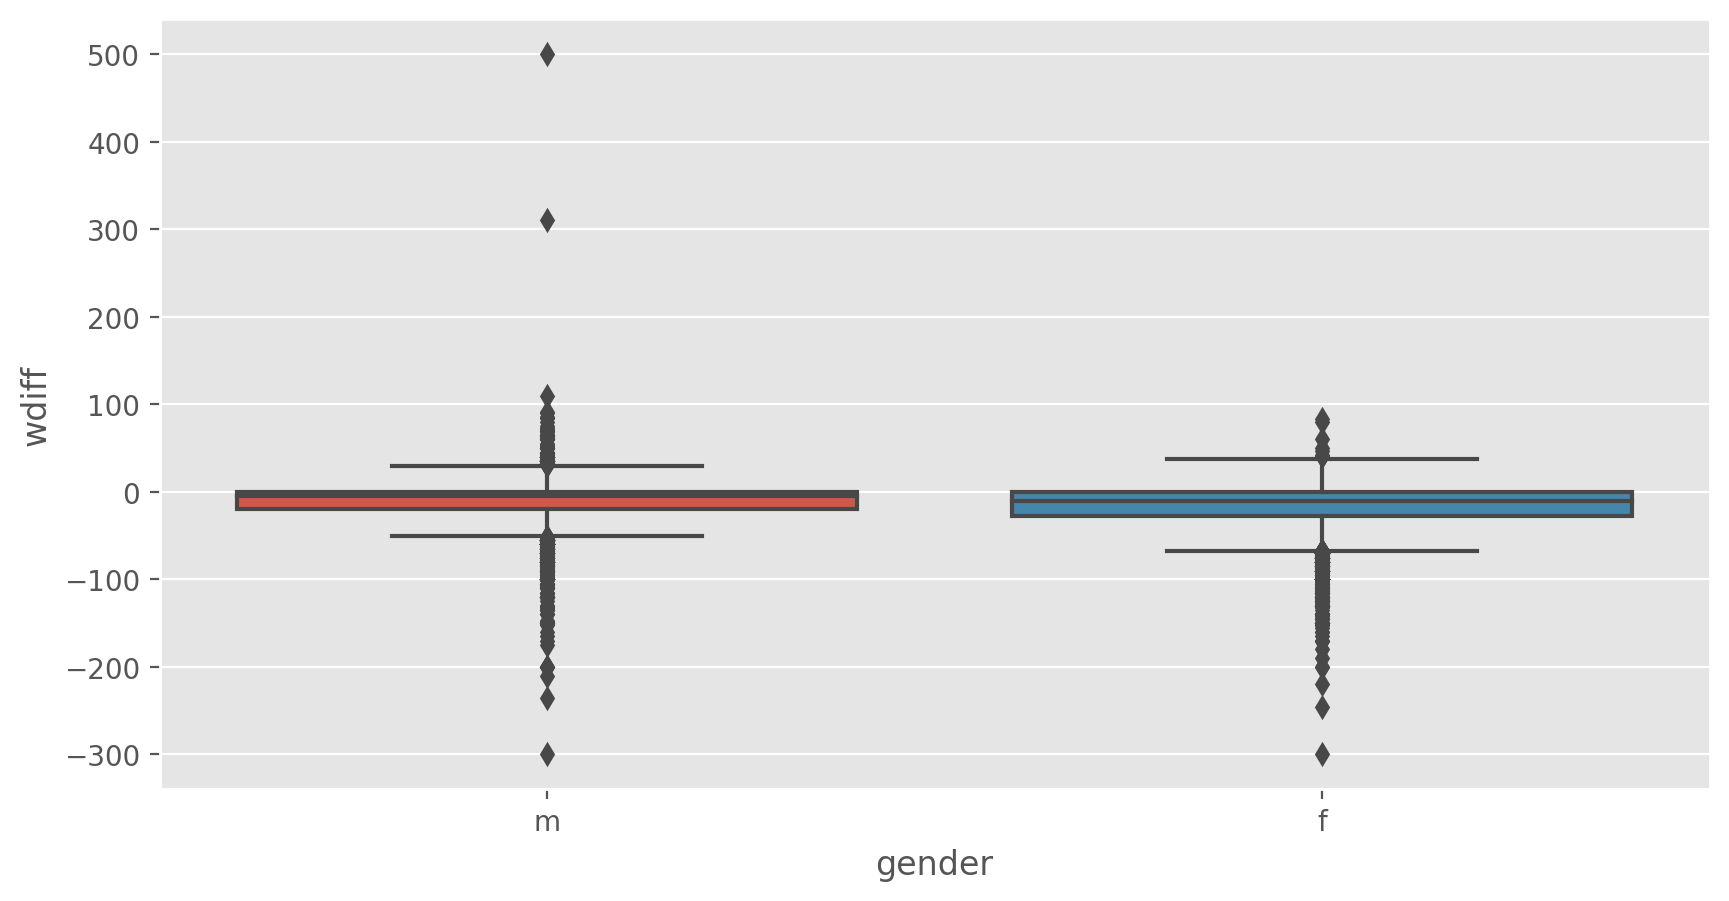

In [16]:
import seaborn as sns
sns.boxplot(x = df['gender'], y = df['wdiff'])
plt.show(); 

There seems to be no significant difference between actual weight and desired weight distribution for men vs. women.

---

**Exercise 13:**  Generate a histogram of `age` with the bin size of 7. Comment on the skewness and modality of this histogram.

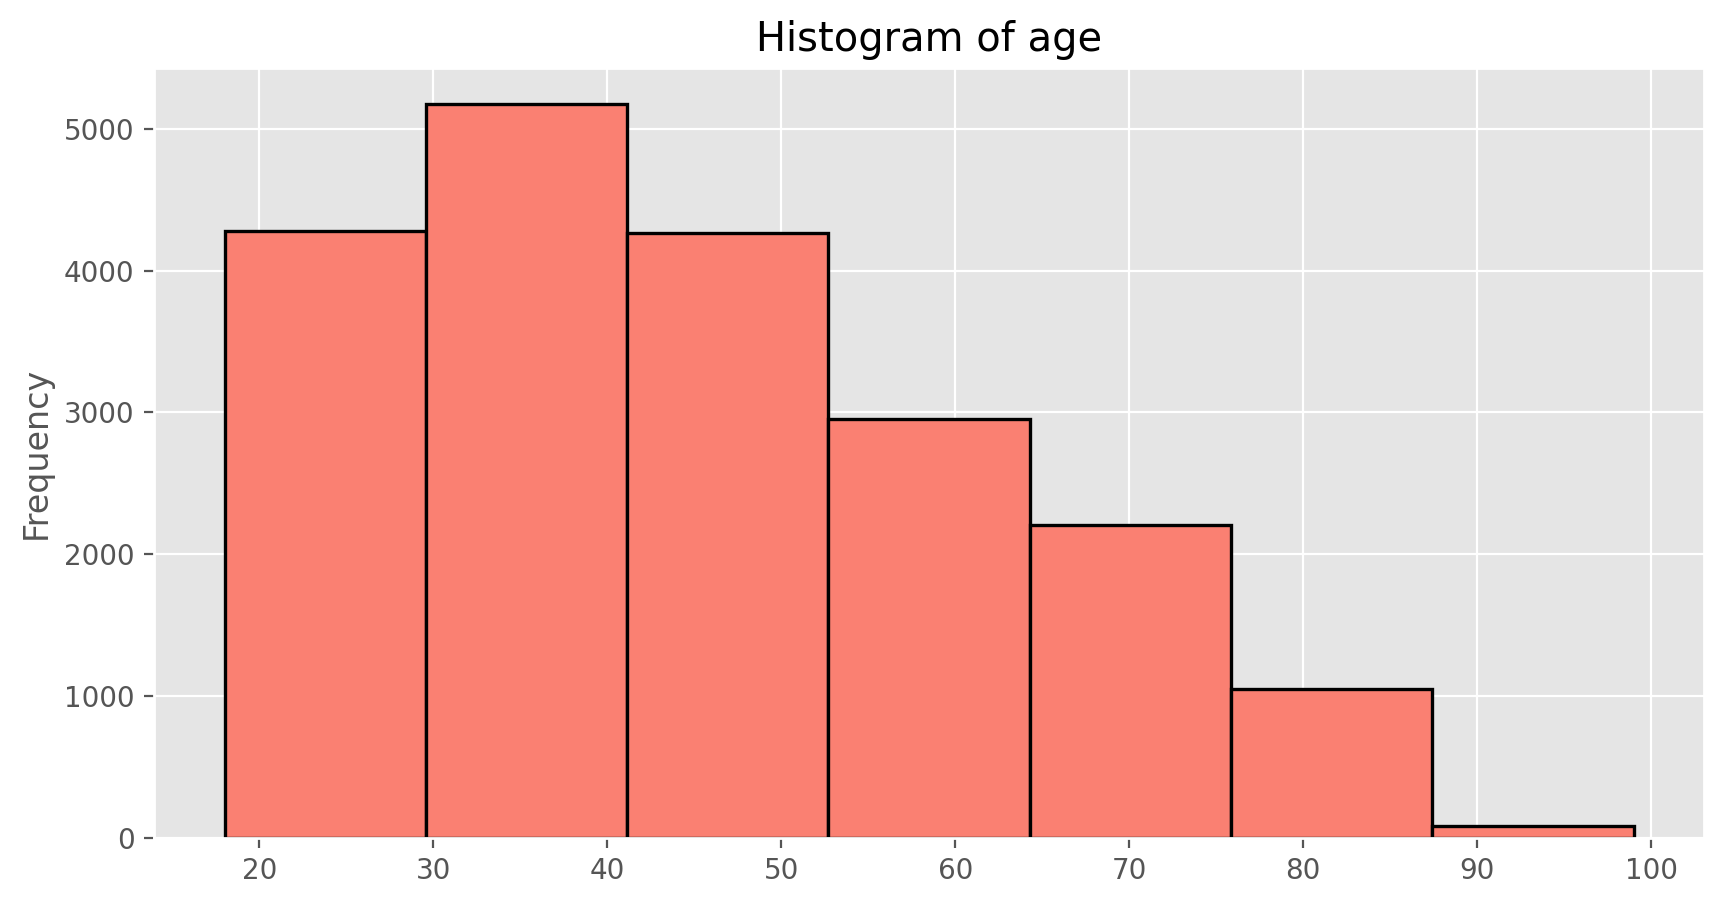

In [17]:
df['age'].plot(kind = 'hist', color = 'salmon', edgecolor = 'black', 
                linewidth = 1.2, title = 'Histogram of age', bins = 7)
plt.show(); 

This histogram suggests a unimodal, right-skewed distribution for age.

---

**Exercise 14:** Make a scatterplot of weight versus desired weight. Set the fill color as blue and alpha level as 0.3. Describe the relationship between these two variables.

**Bonus**: Also fit a red line with a slope of 1 and an intercept value of 0.

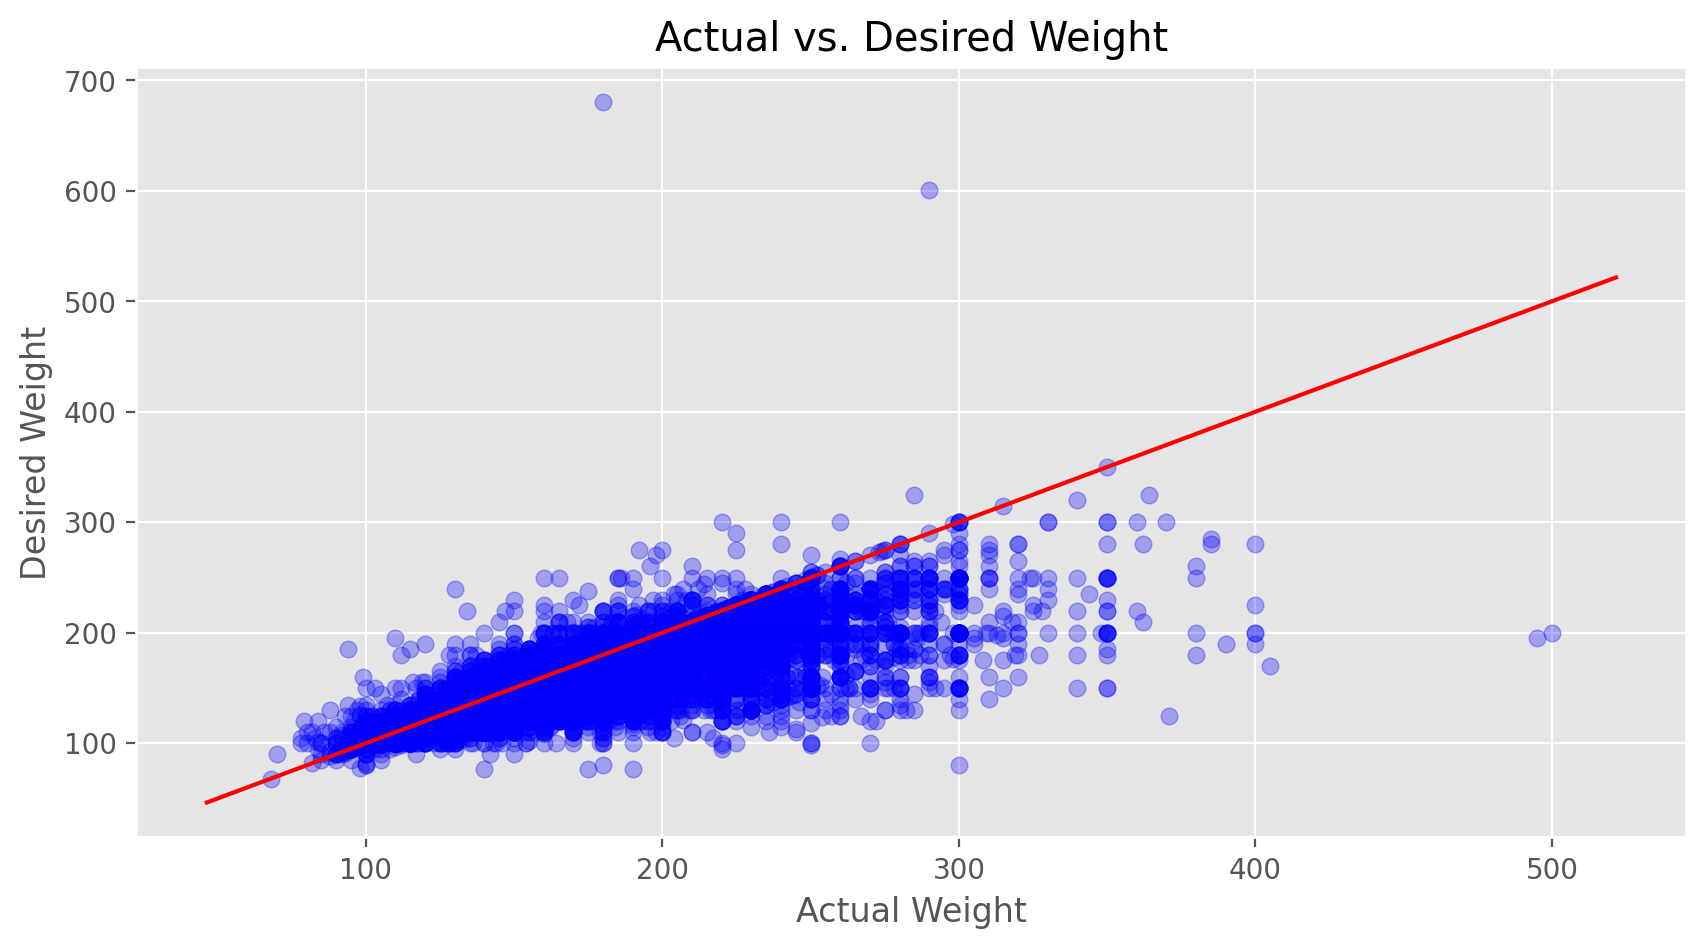

In [18]:
def plot_line(axis, slope, intercept, **kargs):
    xmin, xmax = axis.get_xlim()
    plt.plot([xmin, xmax], [xmin*slope + intercept, xmax*slope + intercept], **kargs)
    
x = df['weight']
y = df['wtdesire']
plt.scatter(x, y,  c = 'blue', alpha = 0.3)
plot_line(axis = plt.gca(), slope = 1, intercept = 0, color = "red")
plt.xlabel('Actual Weight')
plt.ylabel('Desired Weight')
plt.title('Actual vs. Desired Weight')
plt.show();

As the weight increases, the desired weight also increases,
but not as much the weight itself. There are more respondents
who think they are overweight compared to underweight
(more points under the line compared to over the line).